In [26]:
# Basic Libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

%matplotlib inline

# Snappy modules

from snappy import ProductIO
from snappy import HashMap
from snappy import GPF
from snappy import jpy

In [27]:
# Path to the data
s1_path = 'C:/Users/jales/Desktop/S1A.zip'

# Reading the data
product = ProductIO.readProduct(s1_path)

In [28]:
# Orthorectification

parameters = HashMap()

GPF.getDefaultInstance().getOperatorSpiRegistry().loadOperatorSpis()

parameters.put('orbitType', 'Sentinel Precise (Auto Download)')
parameters.put('polyDegree', '3')
parameters.put('continueOnFail', 'false')

apply_orbit_file = GPF.createProduct('Apply-Orbit-File', parameters, product)

In [30]:
# Subseting the image

x = 0 # coordenada X do canto superior esquedo
y = 9928 # coordenada y do canto superior esquerdo
w = 25580 # coordenada x do canto inferior direito
h = 16846 # coordenada y do canto inferior direito

HashMap = jpy.get_type('java.util.HashMap')
GPF.getDefaultInstance().getOperatorSpiRegistry().loadOperatorSpis()

params = HashMap()
params.put('copyMetadata', True)
params.put('region', "%s,%s,%s,%s" % (x, y, w, h))
subset = GPF.createProduct('Subset', params, apply_orbit_file)

In [32]:
# Getting the width of the scene
width = subset.getSceneRasterWidth()
print('Width: {} px'.format(width))

# Getting the height of the scene
height = subset.getSceneRasterHeight()
print('Height: {} px'.format(height))

# Getting the dataset name
name = subset.getName()
print('Name: {}'.format(name))

# Getting the band names in the imagery
band_names = subset.getBandNames()
print('Band names: {}'.format(', '.join(band_names)))

Width: 25580 px
Height: 6919 px
Name: Subset_S1A_Orb
Band names: Amplitude_VH, Intensity_VH, Amplitude_VV, Intensity_VV


In [33]:
def plotBand(data, banda, vmin, vmax):
    
    w = data.getSceneRasterWidth()
    h = data.getSceneRasterHeight()
    band = data.getBand(banda)
    print(w, h)

    band_data = np.zeros(w * h, np.float32)
    band.readPixels(0, 0, w, h, band_data)

    band_data.shape = h, w

    width = 12
    height = 12

    plt.figure(figsize=(width, height))
    imgplot = plt.imshow(band_data, cmap=plt.cm.binary, vmin=vmin, vmax=vmax)

    return imgplot

25580 6919


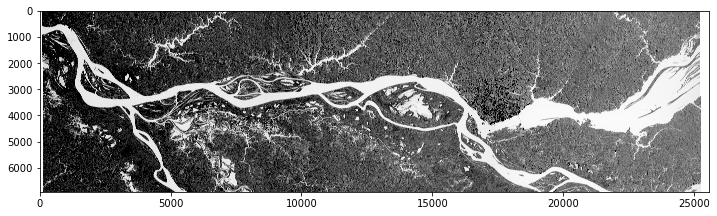

In [35]:
plotBand(subset, 'Intensity_VH', 0, 25000)